## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_df["Mouse ID"])
len(mouse_df["Mouse ID"].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse_df.duplicated("Mouse ID")

In [4]:
# # Optional: Get all the data for the duplicate mouse ID. 
# mouse_df.groupby(["Mouse ID"])

# for mouse in mouse_df["Mouse ID"]:
#     mouse_df.duplicated("Timepoint")
#     print(mouse_df.duplicated("Timepoint"))
    

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drug_groupby = mouse_df.groupby(["Drug Regimen"])

gb_mean = drug_groupby.mean()["Tumor Volume (mm3)"]
gb_median = drug_groupby.median()["Tumor Volume (mm3)"]
gb_variance = drug_groupby.var()["Tumor Volume (mm3)"]
gb_standard_deviation = drug_groupby.std()["Tumor Volume (mm3)"]
gb_SEM = drug_groupby.sem()["Tumor Volume (mm3)"]


groupby_df = {
    "Mean" : gb_mean,
    "Median" : gb_median, 
    "Variance" : gb_variance,
    "Standard Deviation" : gb_standard_deviation,
    "SEM" : gb_SEM
 }

groupby_table = pd.DataFrame(groupby_df)
groupby_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
#agg_drugs = drug_df["Tumor Volume (mm3)"].agg("mean", "median", "var", "std", "sem")

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

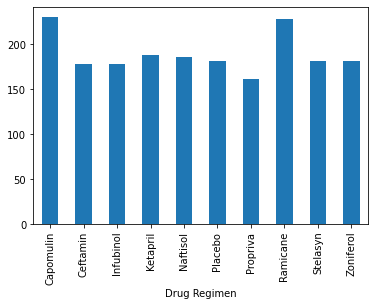

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_graph_data = drug_groupby["Timepoint"].count()


timepoint_graph_data.plot(kind = "bar")


<BarContainer object of 10 artists>

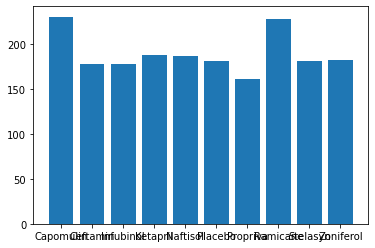

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# regimen_axis = timepoint_graph_data.keys()
# time_axis = timepoint_graph_data.value()
plt.bar(timepoint_graph_data.index, timepoint_graph_data.values)

<AxesSubplot:ylabel='Sex'>

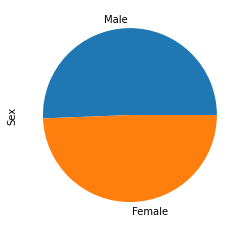

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_groupby = mouse_df["Sex"].value_counts()

sex_groupby.plot(kind= "pie")


([<matplotlib.patches.Wedge at 0x28a6a1c3250>,
 [Text(-0.02099250347258543, 1.0997996703027118, ''),
  Text(0.020992503472585782, -1.0997996703027118, '')])

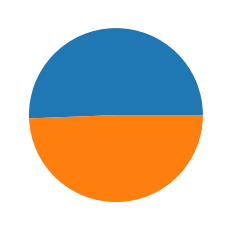

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_groupby.values)



## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_groupby = mouse_df.groupby(["Mouse ID"], as_index=False)["Tumor Volume (mm3)"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_groupby
max_tumor_df = pd.merge(mouse_metadata, max_tumor_groupby)
max_tumor_df.groupby("Drug Regimen")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
